In [1]:
#clone YOLOv5 and
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
/content/yolov5


In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 17.5 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
#import dependncies
import os
import yaml #is used for parsing YAML, a human-readable data serialization standard.
import shutil #The shutil module offers a number of high-level operations on files and collections of files. Its primary purpose is to facilitate copying and removal of files.
import glob #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell. It's useful for file search operations.
from sklearn.model_selection import train_test_split
import subprocess


In [5]:
#define paths
dataset_path = '/content/gdrive/MyDrive/Spartificial_project_folder'
#craters
train_images_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/Spartificial_project_folder/craters/train')
val_images_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/Spartificial_project_folder/valid/images')
test_images_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/Spartificial_project_folder/craters/test')
train_labels_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/Spartificial_project_folder/train/labels')
val_labels_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/Spartificial_project_folder/valid/labels')
test_labels_path = os.path.join(dataset_path, '/content/gdrive/MyDrive/Spartificial_project_folder/craters/test/labels')

# Check if the directories exist
assert os.path.exists(train_images_path), f"Train images path {train_images_path} does not exist"
assert os.path.exists(val_images_path), f"Val images path {val_images_path} does not exist"
assert os.path.exists(test_images_path), f"Test images path {test_images_path} does not exist"
assert os.path.exists(train_labels_path), f"Train labels path {train_labels_path} does not exist"
assert os.path.exists(val_labels_path), f"Val labels path {val_labels_path} does not exist"
assert os.path.exists(test_labels_path), f"Test labels path {test_labels_path} does not exist"




# # Create data.yaml file
# data_yaml = {
#     'train': train_images_path,
#     'val': val_images_path,
#     'test': test_images_path,
#     'nc': 1,#no of classes
#     'names': ['crater']
# }

# data_yaml_path = os.path.join(dataset_path, 'data.yaml')
# with open(data_yaml_path, 'w') as file:
#     yaml.dump(data_yaml, file)

# # Train YOLOv5 model
# os.system(f'python train.py --img 640 --batch 16 --epochs 50 --data {data_yaml_path} --cfg models/yolov5s.yaml --weights yolov5s.pt')
# # --img 640->sets the image size to 640*640 pixels
# # --batch 16->sets the batch size to 16
# # --epochs 50->sets the number of epochs to 50


In [6]:
#Create data.yaml file
# data_yaml = {
#     'train': train_images_path,
#     'val': val_images_path,
#     'test': test_images_path,
#     'nc': 1,#no of classes
#     'names': ['crater']
# }

# data_yaml_path = os.path.join(dataset_path, 'data.yaml')
# with open(data_yaml_path, 'w') as file:
#     yaml.dump(data_yaml, file)

# # Train YOLOv5 model
# os.system(f'python train.py --img 640 --batch 16 --epochs 50 --data {data_yaml_path} --cfg models/yolov5s.yaml --weights yolov5s.pt')
# --img 640->sets the image size to 640*640 pixels
# --batch 16->sets the batch size to 16
# --epochs 50->sets the number of epochs to 50
# Create data.yaml file
data_yaml = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': 1,  # number of classes
    'names': ['crater']
}

data_yaml_path = os.path.join(dataset_path, 'data.yaml')
with open(data_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file)

# Train YOLOv5 model
command = f'python train.py --img 640 --batch 16 --epochs 50 --data {data_yaml_path} --cfg models/yolov5s.yaml --weights yolov5s.pt'
subprocess.run(command, shell=True, check=True)

CompletedProcess(args='python train.py --img 640 --batch 16 --epochs 50 --data /content/gdrive/MyDrive/Spartificial_project_folder/data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt', returncode=0)

In [7]:
!python train.py --img 640 --batch 16 --epochs 50 --data {data_yaml_path} --cfg models/yolov5s.yaml --weights yolov5s.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-11 05:56:11.765109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 05:56:11.785051: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 05:56:11.791093: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [8]:
# Define the path to your test images
test_images_path = '/content/gdrive/MyDrive/Spartificial_project_folder/craters/test/images'
# Run the inference
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source {test_images_path}


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/Spartificial_project_folder/craters/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/19 /content/gdrive/MyDrive/Spartificial_project_folder/craters/test/images/010_png.rf.fcf5e274562ee69a325f9d7a0b30767f.jpg: 640x640 26 craters, 11.9ms
image 2/19 /content/gdrive/MyDrive/Spartificial_project_fol

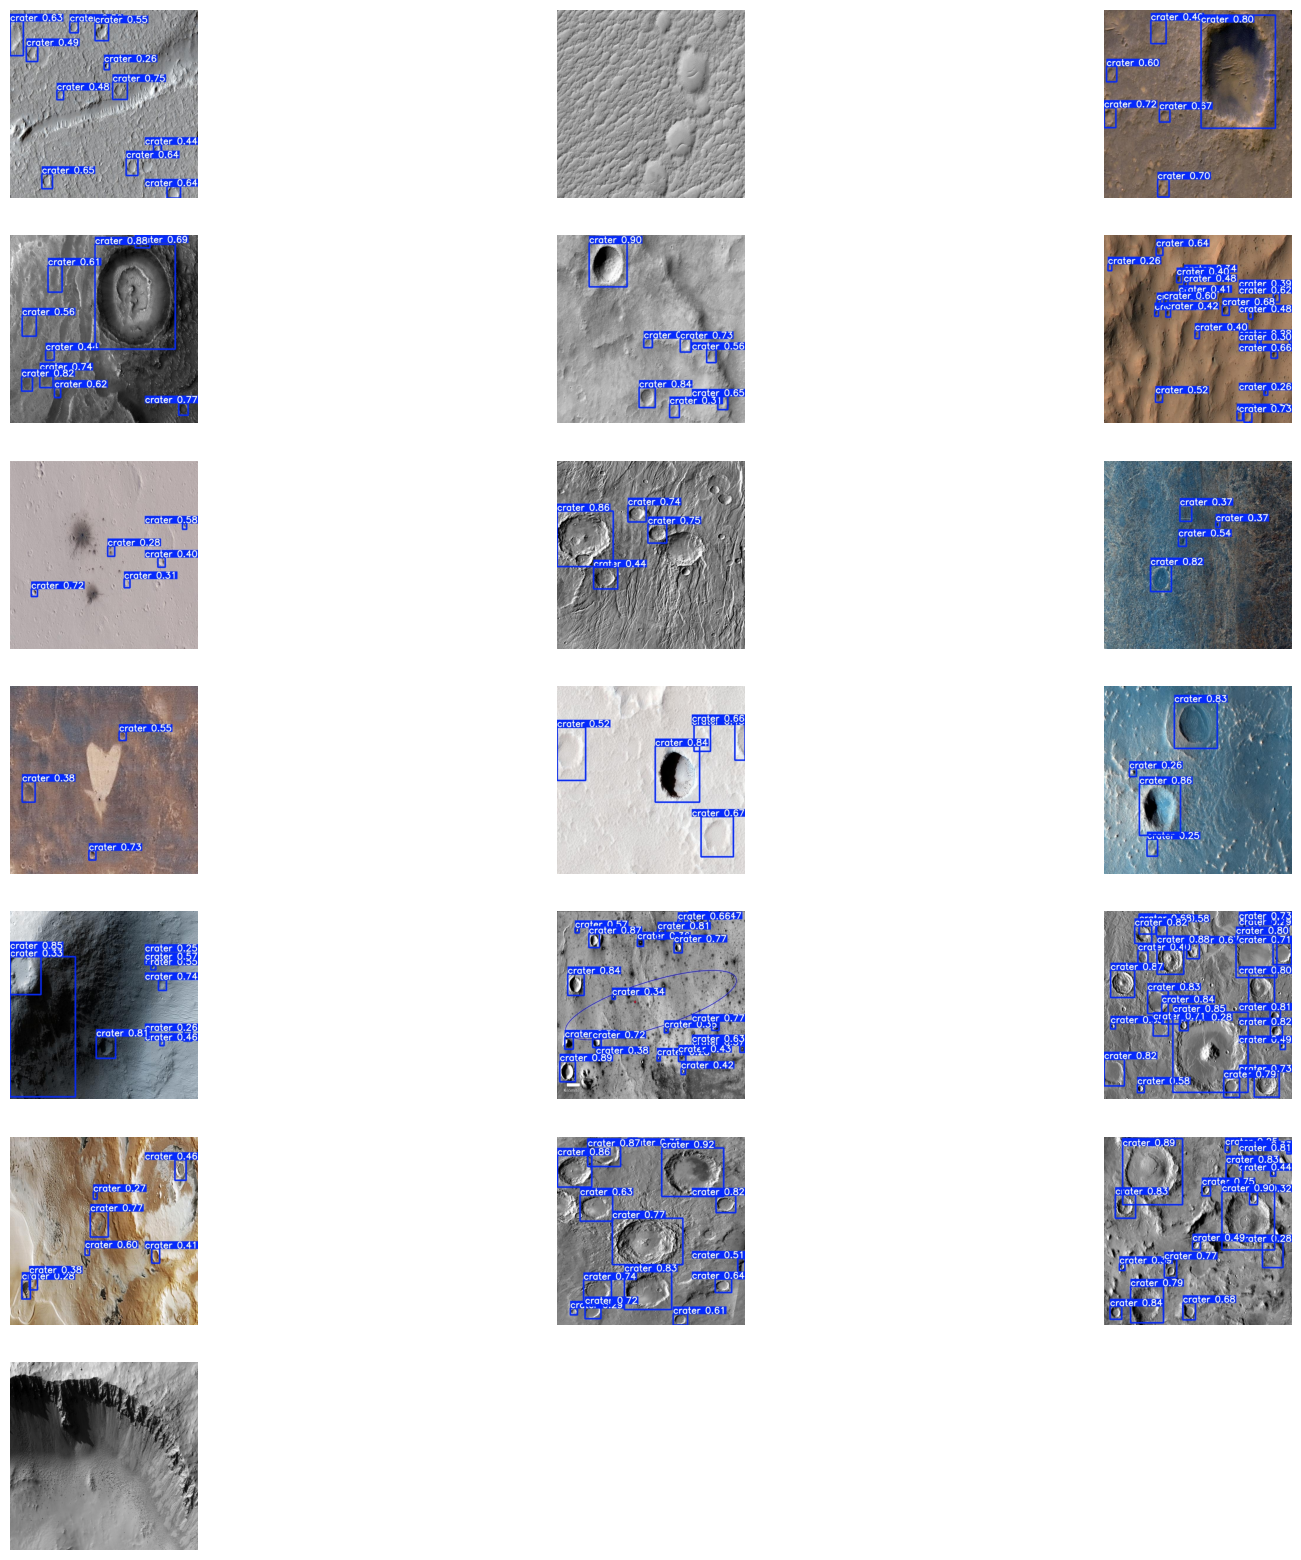

In [9]:

import matplotlib.pyplot as plt
import cv2
import glob

# Path to the directory where the results are saved
results_path = 'runs/detect/exp'

# Get the list of result images
result_images = glob.glob(os.path.join(results_path, '*.jpg'))

# Function to display images
def display_images(images, cols=3, figsize=(15, 15)):
    rows = len(images) // cols + 1
    plt.figure(figsize=figsize)
    for i, img_path in enumerate(images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display the result images
display_images(result_images, cols=3, figsize=(20,20))